In [ ]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import random

class Array:

    def __init__(self, size_x : int = None, size_y : int = None, data : list[list] | None = None) -> None:
        if not data:
            if not isinstance(size_x, int):
                raise TypeError(f"Expectected int type, got {type(size_x)} instead")
            if not isinstance(size_y, int):
                raise TypeError(f"Expectected int type, got {type(size_y)} instead")
        self.size_x = size_x
        self.size_y = size_y
        if size_x is None and size_y is None and data:
            self.data = data
            self.size_x = len(data)
            self.size_y = len(data[0])
        elif size_x == 0 or self.size_y == 0:
            self.data = [[]]
        elif data:
            if isinstance(data, list) and isinstance(data[0], list):
                if len(data) != size_x or len(data[0]) != size_y:
                    raise ValueError("Given sizes do not match data sizes")
                self.data = data
            else: raise TypeError("Unsupported data type")
        else:
            self.data = [[0 for j in range(size_y)] for i in range(size_x)]


    def __getitem__(self, i) -> list:
        return self.data[i]


    def __neg__(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = -self[i][j]

        return self


    def len_x(self) -> int:
        return self.size_x


    def len_y(self) -> int:
        return self.size_y


    def resize(self, new_x : int, new_y : int) -> object:
        if(new_x < self.size_x) or (new_y < self.size_y):
            raise TypeError(
                f"Can't resize 2D array sized {self.size_x}x{self.size_y} to {new_x}x{new_y}")
        for i in self.data:
            for _ in range(new_y - self.size_y):
                i.append(0)

        for _ in range(new_x):
            self.data.append([0 for i in range(new_y)])

        self.size_x = new_x
        self.size_y = new_y

        return self


    def __eq__(self, __value: object) -> bool:
        return self.data == __value.data


    def __add__(self, __value : object | float) -> object:
        if isinstance(__value, (float, int)):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] += __value
            return self
        if type(self) != type(__value):
            raise TypeError(f"Can't add a 2D array to {type(__value)}")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] += __value[i][j]

        return self


    def __sub__(self, __value : object | float) -> object:
        if isinstance(__value, (float, int)):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] -= __value
            return self
        if type(self) != type(__value):
            raise TypeError(f"Can't subtract {type(__value)} with 2D array")
        if (self.size_x != __value.size_x) or (self.size_y != __value.size_y):
            raise ValueError("2D arrays have diffirent size")

        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] -= __value[i][j]

        return self

    def div_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = __value / self[i][j]
        return self

    def __str__(self) -> str:
        s = ""
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += f"{self[i][j]} "
                if j == self.size_y - 1 and i != self.size_x - 1:
                    s += "\n"
        return s

    def random_data(self, _min=0, _max=20) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self.data[i][j] = random.randint(_min, _max)

        return self


    def abs_(self) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] = abs(self[i][j])

        return self

    def sum_(self) -> float:
        s = 0
        for i in range(self.size_x):
            for j in range(self.size_y):
                s += self[i][j]

        return s

    def transpose(self) -> object:
        new_x = self.size_y
        new_y = self.size_x

        new_list = Array(new_x, new_y)
        for i in range(new_x):
            for j in range(new_y):
                new_list.data[i][j] = self.data[j][i]

        return new_list


    def det(self) -> int:
        if self.size_x != self.size_y:
            raise ValueError(
                f"Can't count the determinant for 2D array sized {self.size_x}x{self.size_y}")
        swaps = 0
        det = 1

        for i in range(self.size_x):
            if self[i][i] == 0:
                id = i + 1
                while (id < self.size_x) and (self[id][i] == 0):
                    id += 1
                if id == self.size_x:
                    return 0
                swaps += 1
                self.data[id], self.data[i] = self[i], self[id]
            det *= self[i][i]
            inverse = 1 / self[i][i]
            for j in range(i, self.size_x):
                self[i][j] *= inverse
            for next in range(i + 1, self.size_x):
                ratio = self[next][i]
                for j in range(i, self.size_x):
                    self[next][j] -= self[i][j] * ratio

        return det if swaps % 2 == 0 else -det


    def reverse(self):
        det = self.det()
        if self.size_x == 2:
            return Array(2, 2, [[self[1][1] / det, -self[0][1] / det],
                                [-self[1][0] / det, self[0][0] / det]])


    def __truediv__(self, __value : float | object) -> object:
        if isinstance(__value, (float, int)):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self[i][j] /= __value

            return self
        elif type(__value) == type(self):
            result = Array(self.size_x, self.size_y)
            for i in range(result.size_x):
                result[i][i] = 1
            for i in range(__value.size_x):
                leading = __value[i][i]
                if leading == 0:
                    for j in range(__value.size_y):
                        __value[i][j] += 1
                        result[i][j] += 1
                if leading != 1:
                    for j in range(__value.size_y):
                        __value[i][j] /= leading
                        result[i][j] /= leading

                for k in range(__value.size_x):
                    if k != i:
                        ratio = __value[k][i]
                        for j in range(__value.size_y):
                            __value[k][j] -= ratio * __value[i][j]
                            result[k][j] -= ratio * result[i][j]

            return result * self
        else:
            raise TypeError("Only can divivde 2D array by int or 2D array")


    def _append(self, __value : list) -> object:
        new_list = Array(self.size_x, self.size_y)
        new_list.data = self.data.copy()

        if not isinstance(__value, list):
            raise TypeError(f"Expected a list, got {type(__value)} instead")
        if len(__value) != new_list.size_y:
            raise ValueError("Can't add a list to an array as they have different lenght")

        new_list.data.append(__value)
        new_list.size_x += 1

        return new_list


    def mean(self, option : int | None =None) -> float | object:
        if option is None:
            lenght = self.size_x * self.size_y
            s = 0
            for i in range(self.size_x):
                s += sum(self[i][j] for j in range(self.size_y))
            return s / lenght

        if option == 0:
            result = Array(1, self.size_y)
            for j in range(self.size_y):
                result[-1][j] = sum(self[i][j] for i in range(self.size_x)) / self.size_x
            return result

        if option == 1:
            result = Array(1, self.size_x)
            for j in range(self.size_x):
                result[-1][j] = sum(self[j][i] for i in range(self.size_y)) / self.size_y
            return result.transpose()


    def __mul__(self, __value : float | object) -> object:
        if isinstance(__value, (float, int)):
            for i in range(self.size_x):
                for j in range(self.size_y):
                    self.data[i][j] *= __value
            return self
        if type(__value) == type(self):
            if self.size_y != __value.size_x:
                raise ValueError(
                    f"Can't multiply 2D array sized {self.size_x}x{self.size_y} with 2D array sized {__value.size_x}x{__value.size_y}")
            result = Array(self.size_x, __value.size_y)
            for i in range(result.size_x):
                for j in range(result.size_y):
                    result.data[i][j] = sum(self[i][k] * __value[k][j]
                                            for k in range(__value.size_x))
            return result
        raise TypeError("Only can multiply 2D array with int or 2D array")


    def __pow__(self, n : int) -> object:
        for _ in range(n - 1):
            self *= self
        return self



    def pow_(self, __value : int) -> object:
        for i in range(self.size_x):
            for j in range(self.size_y):
                self[i][j] **= __value

        return self


    def unique(self, coloum : int):
        if not isinstance(coloum, int):
            raise TypeError("A coloum index can only be int")
        if coloum > self.size_y or coloum < 0:
            raise ValueError("Given coloum number doesn't exit in 2D array")
        unique = set()
        for i in range(self.size_x):
            unique.add(self[i][coloum])

        return unique


    def select_rows(self, indices : list) -> object:
        selected_data = [self[i] for i in indices]

        return Array(data=selected_data)


    def select_columns(self, indices: list) -> object:
        selected_data = [[row[i] for i in indices] for row in self.data]

        return Array(data=selected_data)


#a = Array(1, 2, [[2, 2]])

In [ ]:
class Distance_functions:

    @staticmethod
    def euclidian_distance(a, b) -> float:
        s = 0
        for i, x in enumerate(a):
            s += (x - b[i]) ** 2
        return s


class Kernel_functions:


    @staticmethod
    def gaussinan_kernel(x : float) -> float:
        return math.exp(-x * x * 2) * ((math.pi * 2) ** -1)

    @staticmethod
    def biquadratic_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (15 * (1 - x * x ) ** 2) / 16

    @staticmethod
    def epanechnikov_kernel(x : float) -> float:
        return 0 if abs(x) > 1 else (3 * (1 - x * x) ** 2) / 4

In [ ]:
class Regression_base:

    def __init__(self, kernel : object, h : float = None) -> None:
        self.kernel = kernel
        self.h = h
        self.X = None
        self.y = None

In [ ]:
class Nadaraya_Watson_model(Regression_base):

    def __init__(self, kernel : object = Kernel_functions.gaussinan_kernel, h : float = 1) -> None:
        super().__init__(kernel, h)



    def fit(self, X : object, y : list) -> None:
        self.X = X
        self.y = y
        if self.X.size_x != len(self.y):
            raise ValueError("Lenghth of object set must be equal to length of answer set")


    def calculate_distance(self, point : list, dist_function : object) -> list:
        distances = []
        for row in self.X:
            distances.append(dist_function(row, point))

        return distances


    def predict(self, point : list | tuple, dist_function : object = Distance_functions.euclidian_distance) -> float:
        distances = self.calculate_distance(point, dist_function)
        num = sum((self.y[i] * self.kernel(distances[i] / self.h)) for i in range(len(distances)))
        denom = sum(self.kernel(distances[i] / self.h) for i in range(len(distances)))

        return num / denom

In [ ]:
model = Nadaraya_Watson_model(Kernel_functions.gaussinan_kernel, 1)

In [ ]:
data = sns.load_dataset('tips')

In [ ]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


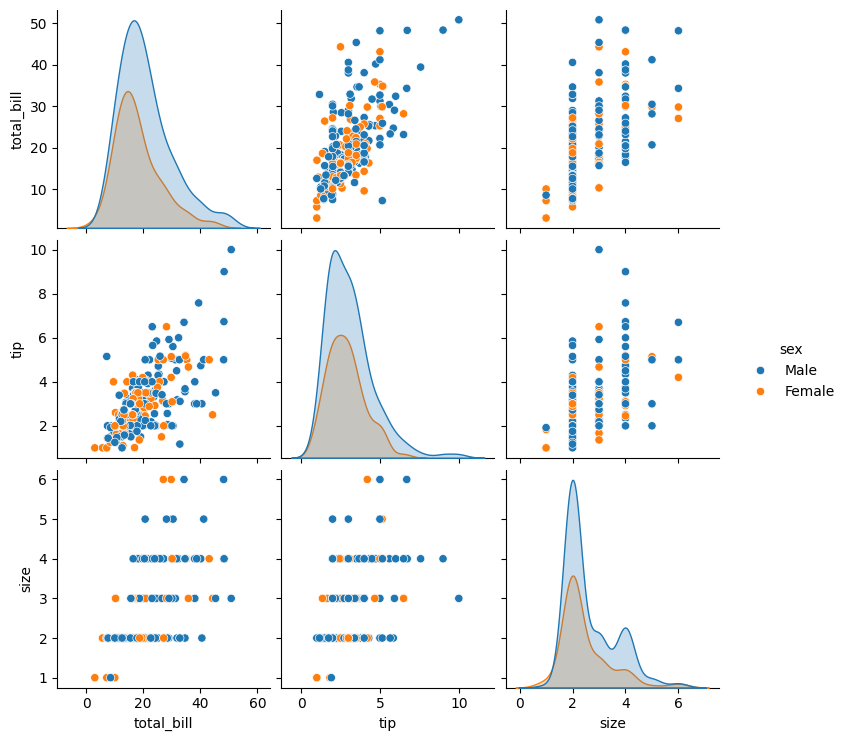

In [ ]:
sns.pairplot(data, hue = "sex")

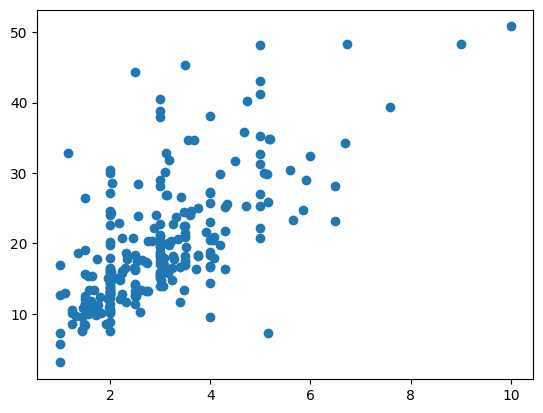

In [ ]:
plt.scatter(data["tip"], data["total_bill"])
plt.show()

In [ ]:
encode = {'Female' : 0, 'Male' : 1}
data = data.replace({'sex' : encode})

In [ ]:
data = data.drop(['smoker', 'day', 'time', 'size'], axis = 1)

In [ ]:
data.head()

,total_bill,tip,sex
0,16.99,1.01,0
1,10.34,1.66,1
2,21.01,3.50,1
3,23.68,3.31,1
4,24.59,3.61,0


In [ ]:
transform, head = [], []
for i in data:
  head.append(i)
  transform.append(data[i].to_list())

In [ ]:
transformed_data = Array(data=transform)

In [ ]:
print(transformed_data[0])

[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.77, 26.88, 15.04, 14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29, 16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37, 12.69, 21.7, 19.65, 9.55, 18.35, 15.06, 20.69, 17.78, 24.06, 16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94, 9.68, 30.4, 18.29, 22.23, 32.4, 28.55, 18.04, 12.54, 10.29, 34.81, 9.94, 25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02, 18.29, 17.59, 20.08, 16.45, 3.07, 20.23, 15.01, 12.02, 17.07, 26.86, 25.28, 14.73, 10.51, 17.92, 27.2, 22.76, 17.29, 19.44, 16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16, 28.97, 22.49, 5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3, 22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.0, 7.25, 38.07, 23.95, 25.71, 17.31, 29.93, 10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8, 8.52, 14.52, 11.38, 22.82, 19.08, 20.27, 11.17, 12.26, 18.26, 8.51, 10.33, 14.15, 16.0, 13.16, 17.47, 34.3, 41.19, 27.05, 16.43, 8.

In [ ]:
X = transformed_data[1:]

In [ ]:
X = Array(data=X).transpose()
y = transformed_data[0]

In [ ]:
print(X[:6])

[[1.01, 0], [1.66, 1], [3.5, 1], [3.31, 1], [3.61, 0], [4.71, 1]]


In [ ]:
model = Nadaraya_Watson_model()
model.fit(X, y)

In [ ]:
diff, result = [], []
for i in range(len(y)):
   diff.append(abs(model.predict(X[i]) - y[i]))
   result.append(model.predict(X[i]))

In [ ]:
sum(diff)

1129.7834387740495

In [ ]:
predictions = pd.DataFrame(data={'total_bill' : result, 'tip' : data["tip"], 'sex' : data["sex"]})

<Axes: xlabel='tip', ylabel='total_bill'>

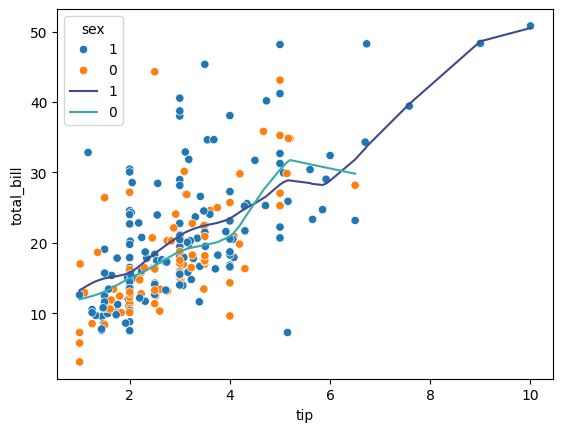

In [ ]:
sns.scatterplot(x=data["tip"], y=data["total_bill"], color='blue', hue=data["sex"])
sns.lineplot(x=predictions["tip"], y=predictions["total_bill"], color='orange', hue=data["sex"], palette="mako")

In [ ]:
class Regression_mectrics:

    @staticmethod
    def mse(predicted : list, expected : list) -> float:
        if not (isinstance(predicted, list) or isinstance(predicted, list)):
            raise TypeError("Expected lists")
        if len(predicted) != len(expected):
            raise ValueError("Precintions size must be equal to real data size")

        s = 0
        n = len(predicted)
        for i in range(n):
            s += (expected[i] - predicted[i]) ** 2

        return s / len(predicted)


    @staticmethod
    def mae(predicted : list, expected : list) -> float:
        if not (isinstance(predicted, list) or isinstance(predicted, list)):
            raise TypeError("Expected lists")
        if len(predicted) != len(expected):
            raise ValueError("Precintions size must be equal to real data size")

        s = 0
        n = len(predicted)
        for i in range(n):
            s += abs(expected[i] - predicted[i])

        return s / len(predicted)


    @staticmethod
    def r_squared(predicted : list, expected : list, y_mean : float) -> float:
        """y_mean must be taken from train dataset"""
        s, mean = 0, 0
        n = len(predicted)
        for i in range(n):
            s += (expected[i] - predicted[i]) ** 2
            mean += (expected[i] - y_mean) ** 2
        return 1 - (s / mean)


    @staticmethod
    def mape(predicted : list, expected : list) -> float:
        if not (isinstance(predicted, list) or isinstance(expected, list)):
            raise TypeError("Expected lists")
        if len(predicted) != len(expected):
            raise ValueError("Precintions size must be equal to real data size")

        s = 0
        n = len(predicted)
        for i in range(n):
            s += abs((expected[i] - predicted[i])) / (abs(expected[i]) + 0.00000001)

        return s / len(predicted)


In [ ]:
print(Regression_mectrics.mse(result, y))
print(Regression_mectrics.mae(result, y))
print(Regression_mectrics.mape(result, y))
print(Regression_mectrics.r_squared(result, y, sum(y) / len(y)))

40.82809164453635
4.630259994975613
0.27148568305928905
0.48271812756039545


In [ ]:
model = Nadaraya_Watson_model()
model.fit(Array(data=[X]).transpose(), y)

In [ ]:
diff, result = [], []
x = Array(data=X).transpose()
for i in range(len(y)):
   result.append(model.predict(x[i]))

In [ ]:
x = [random.uniform(min(*X), max(*X)) for i in range(1000)]
real = [math.sin(i) for i in x]

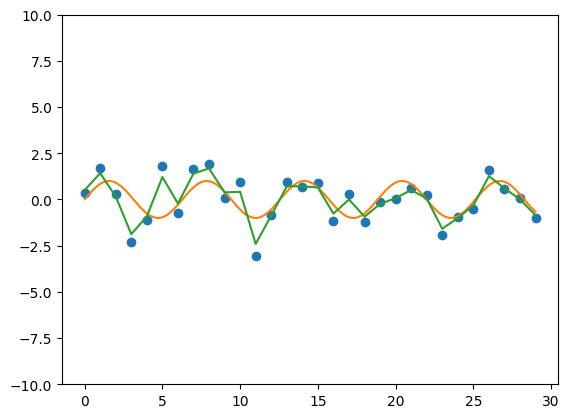

In [ ]:
plt.ylim(-10, 10)
plt.plot(*X, y, 'o')
sns.lineplot(x=x, y=real)
plt.plot(*X, result)